In [2]:
!pip install pandas numpy matplotlib seaborn jupyterlab

In [3]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from scipy.stats import f_oneway

In [3]:
    #3.2 TEAM COMPARISON ANALYSIS

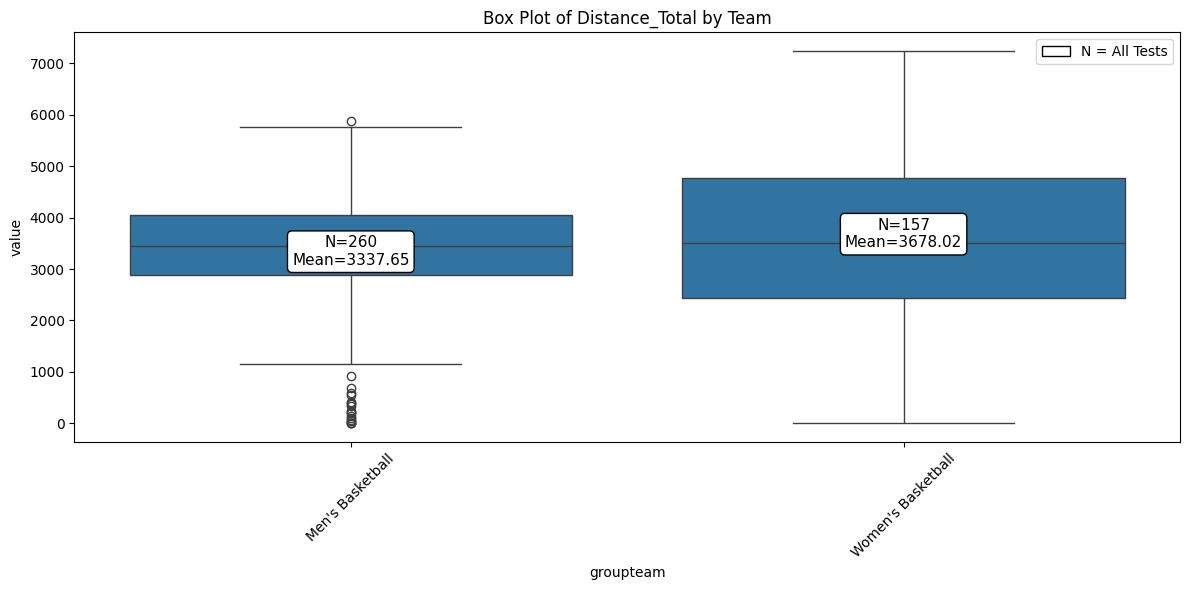

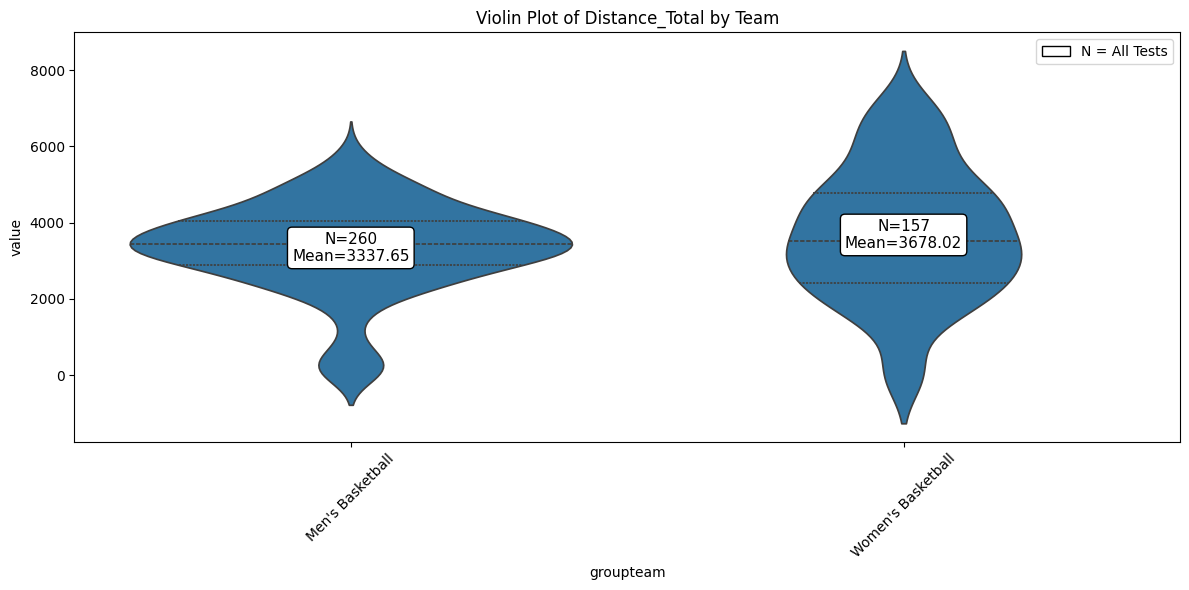

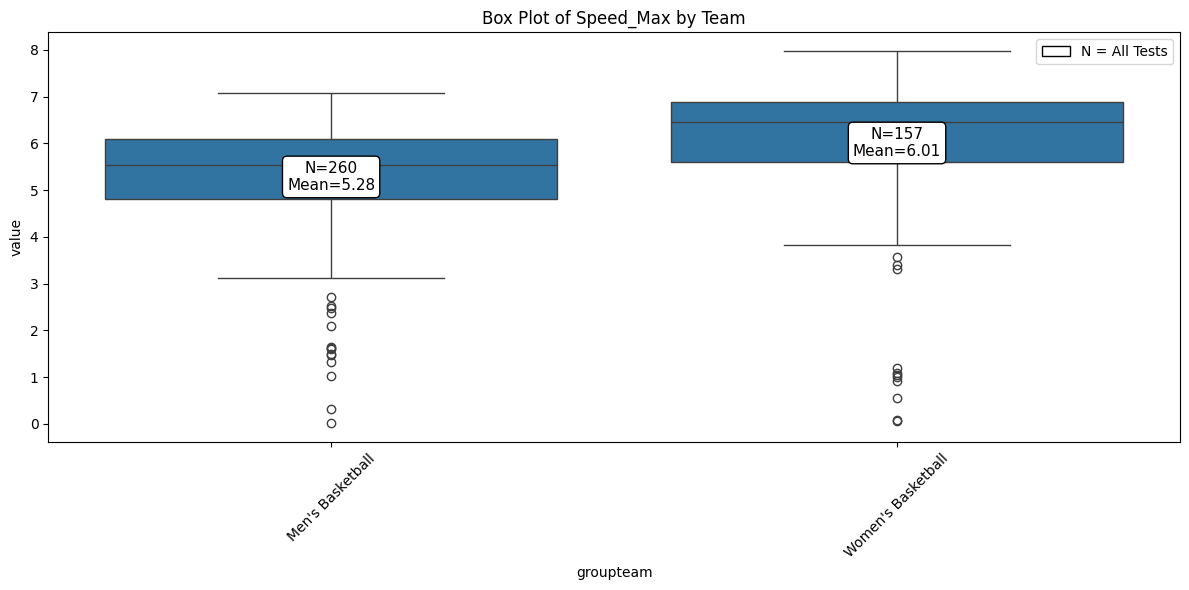

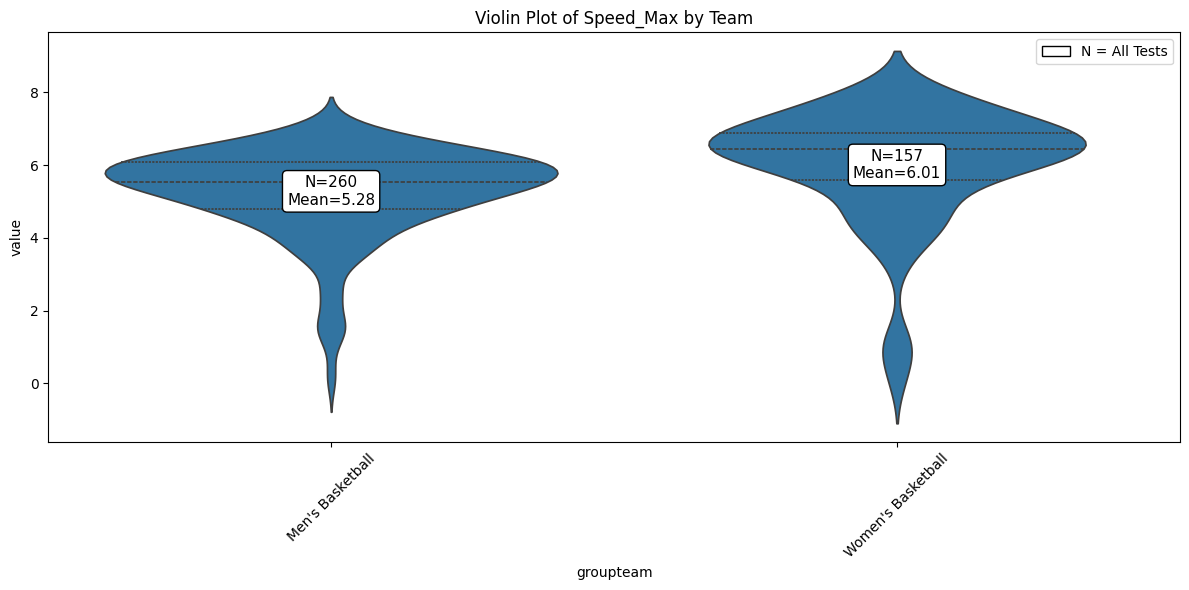

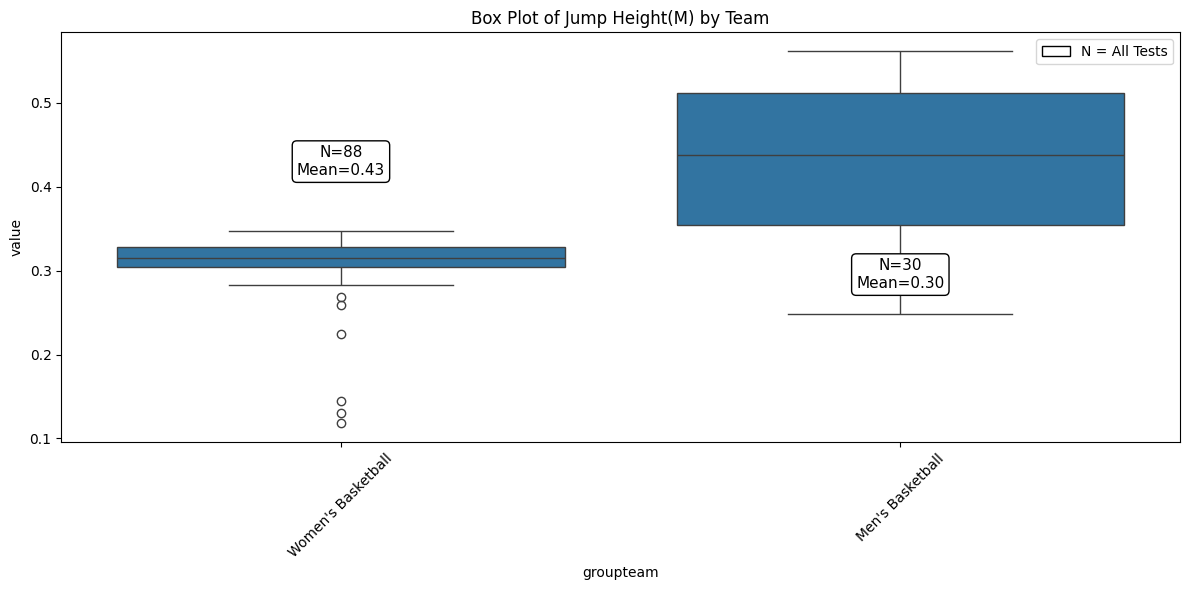

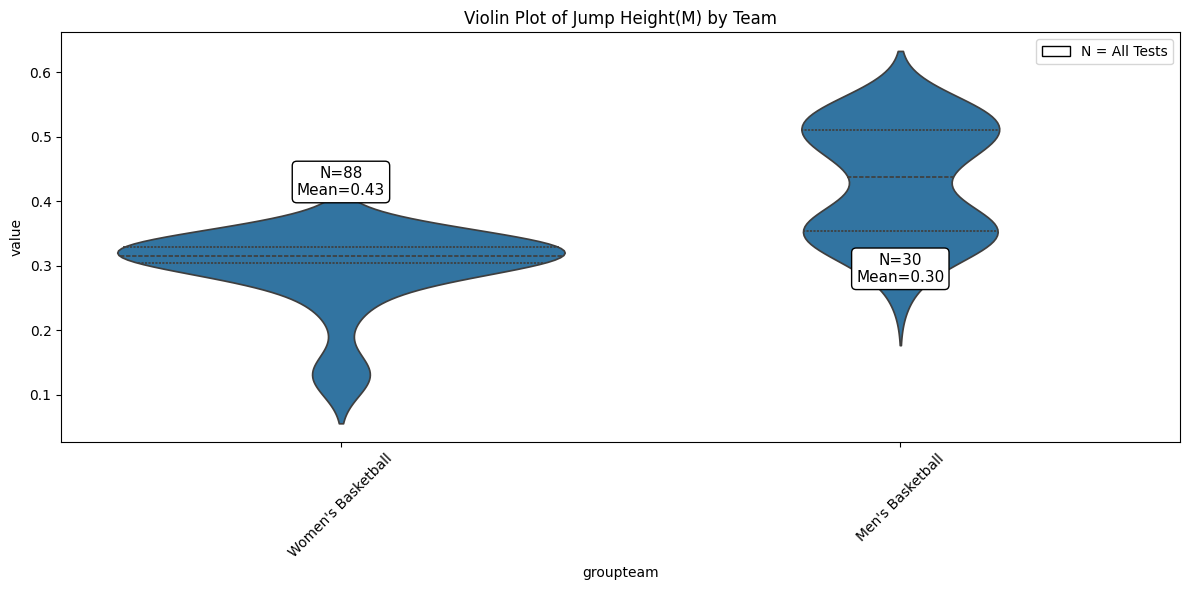

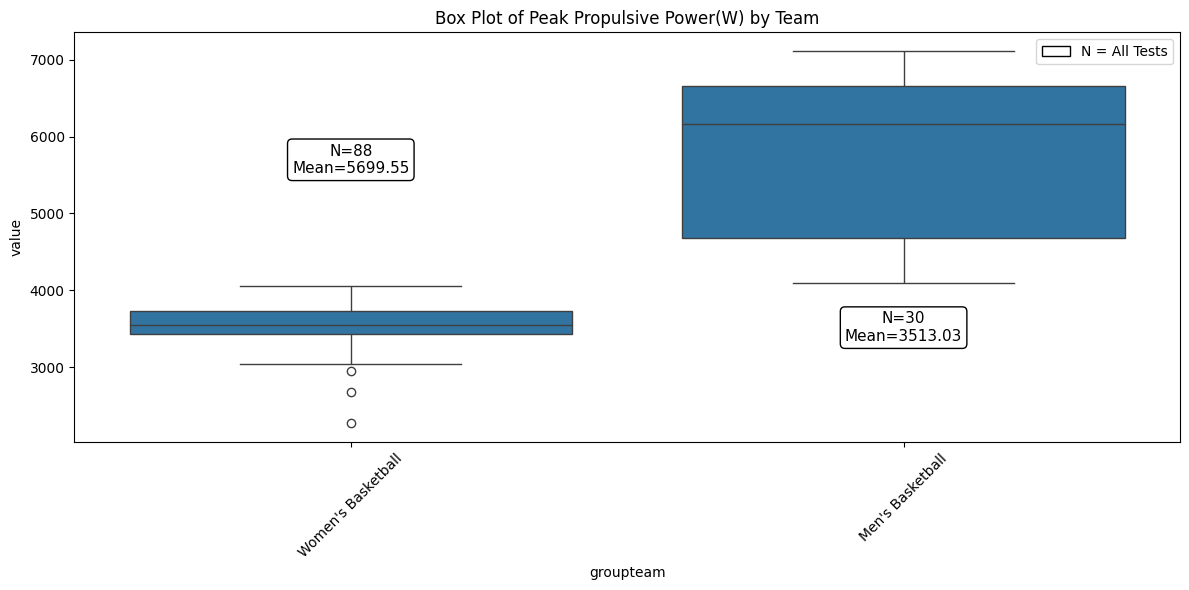

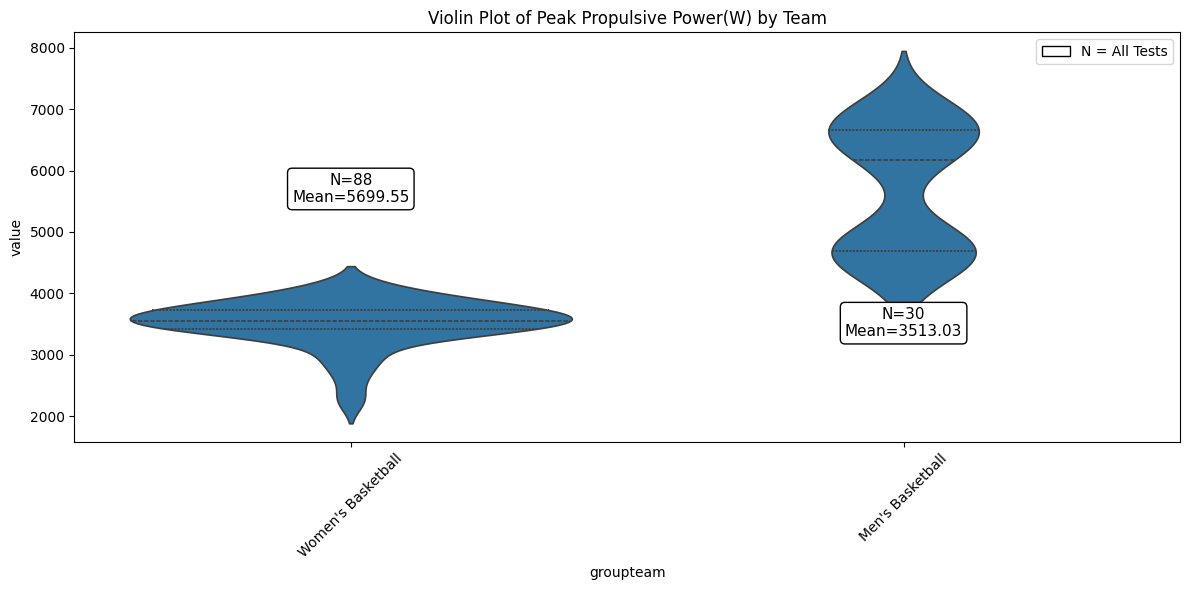

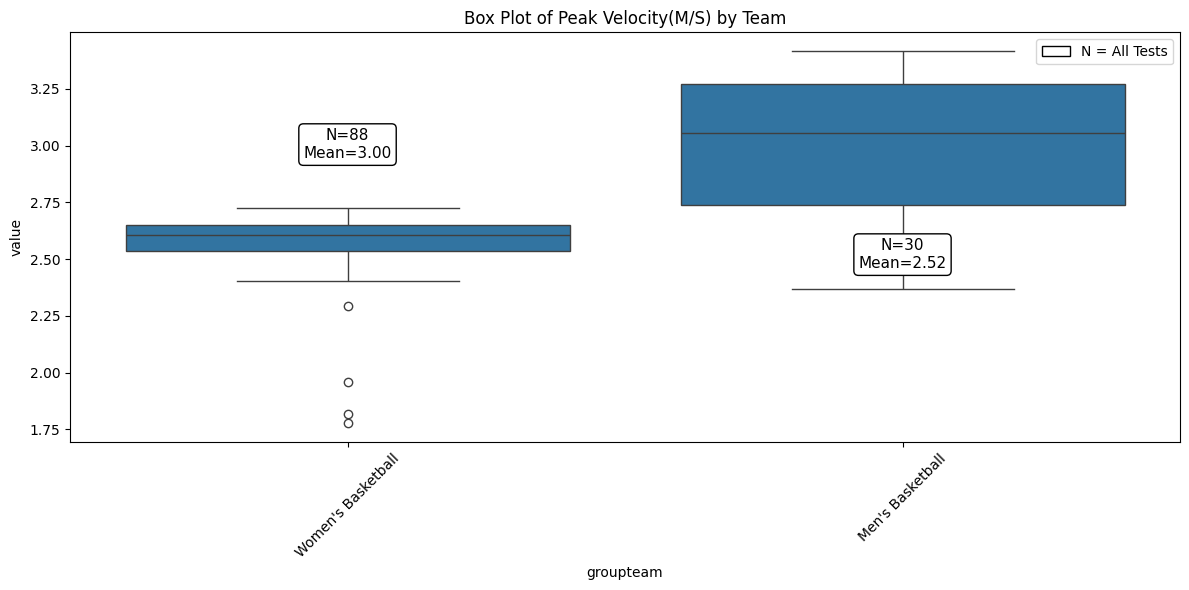

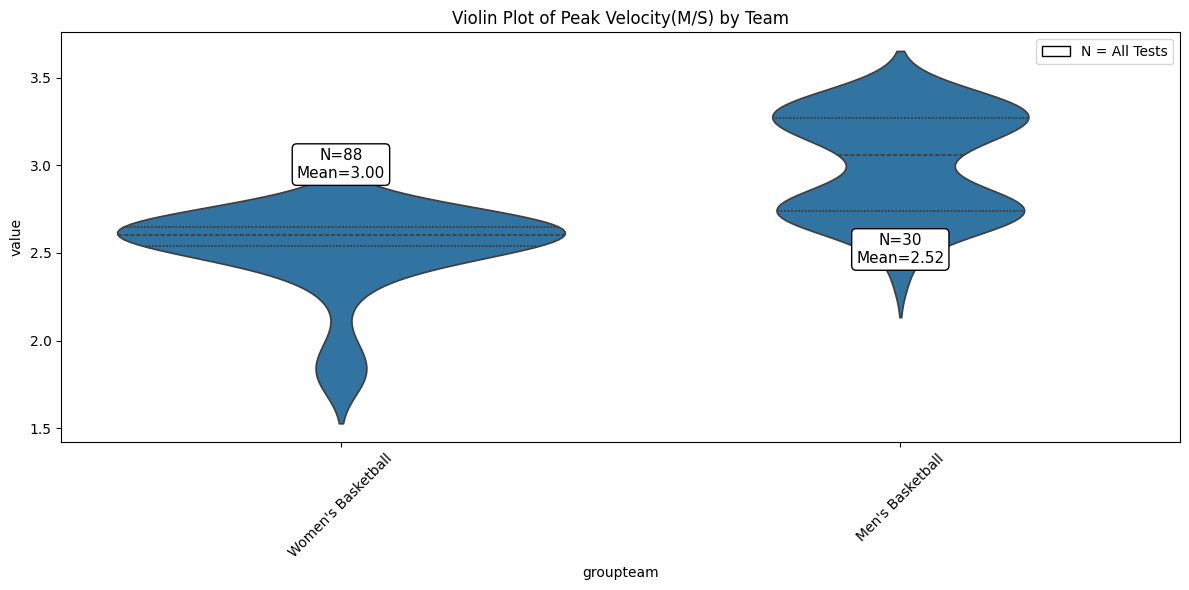

In [2]:
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd

# Load and clean dataset
df = pd.read_csv('../raw/selected_players_data.csv')
df['timestamp'] = pd.to_datetime(df['timestamp'], errors='coerce')
df = df.dropna(subset=['value', 'groupteam', 'metric'])

# Identify all unique metrics present in the dataset
all_metrics = df['metric'].unique()

for metric in all_metrics:
    metric_df = df[df['metric'] == metric]

    # Count number of tests per team
    counts = metric_df['groupteam'].value_counts()
    means = metric_df.groupby('groupteam')['value'].mean()

    # Box Plot
    plt.figure(figsize=(12, 6))
    ax = sns.boxplot(x='groupteam', y='value', data=metric_df)
    plt.title(f"Box Plot of {metric} by Team")
    plt.xticks(rotation=45)

    # Add counts and means
    for i, team in enumerate(counts.index):
        n = counts[team]
        mean_val = means[team]
        # Place text slightly above the mean line
        ax.text(i, mean_val, f"N={n}\nMean={mean_val:.2f}",
                ha='center', va='center', fontsize=11, color='black',
                bbox=dict(facecolor='white', edgecolor='black', boxstyle='round,pad=0.3'))

    # Add legend for annotation meaning
    from matplotlib.patches import Patch
    legend_elements = [
        Patch(facecolor='white', edgecolor='black', label='N = All Tests')
    ]
    ax.legend(handles=legend_elements, loc='upper right')

    plt.tight_layout()
    plt.show()

    # Violin Plot
    plt.figure(figsize=(12, 6))
    ax = sns.violinplot(x='groupteam', y='value', data=metric_df, inner='quartile')
    plt.title(f"Violin Plot of {metric} by Team")
    plt.xticks(rotation=45)

    # Add counts and means
    for i, team in enumerate(counts.index):
        n = counts[team]
        mean_val = means[team]
        ax.text(i, mean_val, f"N={n}\nMean={mean_val:.2f}",
                ha='center', va='center', fontsize=11, color='black',
                bbox=dict(facecolor='white', edgecolor='black', boxstyle='round,pad=0.3'))

    # Add legend
    ax.legend(handles=legend_elements, loc='upper right')

    plt.tight_layout()
    plt.show()

In [5]:
# 3.2B Calculate statistical significance (t-test or ANOVA as appropriate)

# Load and clean dataset
df = pd.read_csv('../raw/selected_players_data.csv')
df['timestamp'] = pd.to_datetime(df['timestamp'], errors='coerce')
df = df.dropna(subset=['value', 'groupteam', 'metric'])

# Prepare container for ANOVA results
anova_results = []

# Loop through each metric in the dataset
for metric in df['metric'].unique():
    metric_df = df[df['metric'] == metric]
    teams = metric_df['groupteam'].unique()

    # Collect metric values for each team
    team_values = [metric_df[metric_df['groupteam'] == team]['value'].values for team in teams]

    # Skip metric if any team has fewer than 2 observations
    if any(len(vals) < 2 for vals in team_values):
        continue

    # Perform one-way ANOVA across teams
    stat, p = f_oneway(*team_values)

    # Store results with significance flag
    anova_results.append({
        'metric': metric,
        'F_statistic': round(stat, 2),
        'p_value': round(p, 2),
        'significant': p < 0.05
    })

# Display results in a DataFrame
anova_df = pd.DataFrame(anova_results)
print("ANOVA results comparing groupteam for each metric:")
print(anova_df.sort_values(by='metric'))

ANOVA results comparing groupteam for each metric:
                     metric  F_statistic  p_value  significant
0            Distance_Total         5.63     0.02         True
2            Jump Height(M)        60.72     0.00         True
3  Peak Propulsive Power(W)       131.68     0.00         True
4        Peak Velocity(M/S)        67.35     0.00         True
1                 Speed_Max        27.37     0.00         True


<Figure size 1400x600 with 0 Axes>

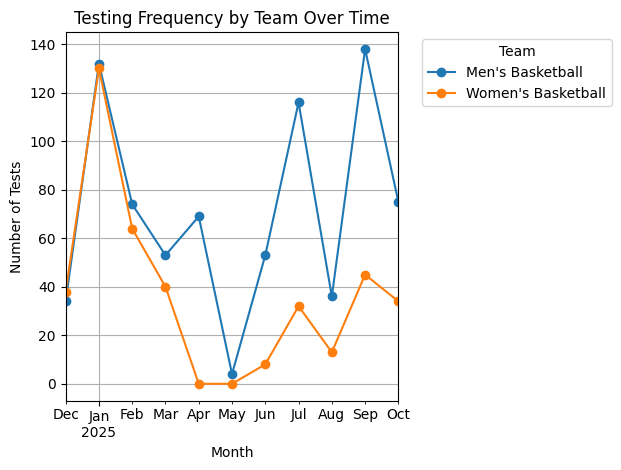

In [7]:
#3.2C  Create a visualization showing testing frequency by team over time

# Load and clean the dataset
df = pd.read_csv('../raw/selected_players_data.csv')
df['timestamp'] = pd.to_datetime(df['timestamp'], errors='coerce')
df = df.dropna(subset=['timestamp', 'groupteam'])

# Create a 'month' column
df['month'] = df['timestamp'].dt.to_period('M').dt.to_timestamp()

# Group by team and month to count tests
test_counts = df.groupby(['groupteam', 'month']).size().reset_index(name='test_count')

# Pivot for plotting
pivot_df = test_counts.pivot(index='month', columns='groupteam', values='test_count').fillna(0)

# Plot
plt.figure(figsize=(14, 6))
pivot_df.plot(marker='o')
plt.title("Testing Frequency by Team Over Time")
plt.xlabel("Month")
plt.ylabel("Number of Tests")
plt.grid(True)
plt.legend(title='Team', bbox_to_anchor=(1.05, 1), loc='upper left')
plt.tight_layout()
plt.show()

In [7]:
#3.3  Dashboard Metric 

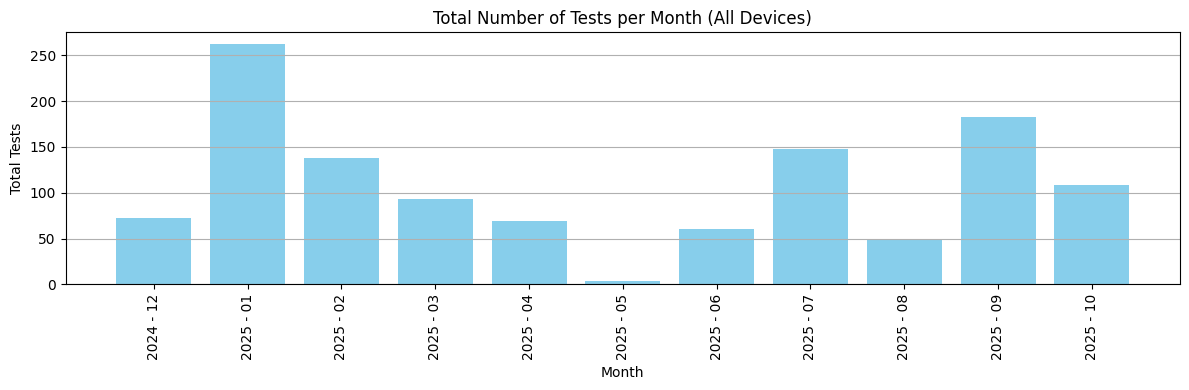

In [8]:
# 3.3A Total number of tests per month (all systems combined)
import pandas as pd
import matplotlib.pyplot as plt

# Load dataset and ensure timestamps are valid
df = pd.read_csv('../raw/selected_players_data.csv')
df['timestamp'] = pd.to_datetime(df['timestamp'], errors='coerce')

# Keep only rows with valid timestamps and device information
df = df.dropna(subset=['timestamp', 'device'])

# Create a 'month' column from timestamps
df['month'] = df['timestamp'].dt.to_period('M').dt.to_timestamp()

# Count total number of tests per month
monthly_tests = df.groupby('month').size().reset_index(name='total_tests')

# Format month for display (YYYY - MM)
monthly_tests['month_str'] = monthly_tests['month'].dt.strftime('%Y - %m')

# Plot monthly test counts as a bar chart
plt.figure(figsize=(12, 4))
plt.bar(monthly_tests['month_str'], monthly_tests['total_tests'], color='skyblue')
plt.title("Total Number of Tests per Month (All Devices)")
plt.xlabel("Month")
plt.ylabel("Total Tests")
plt.xticks(rotation=90)
plt.tight_layout()
plt.grid(axis='y')
plt.show()

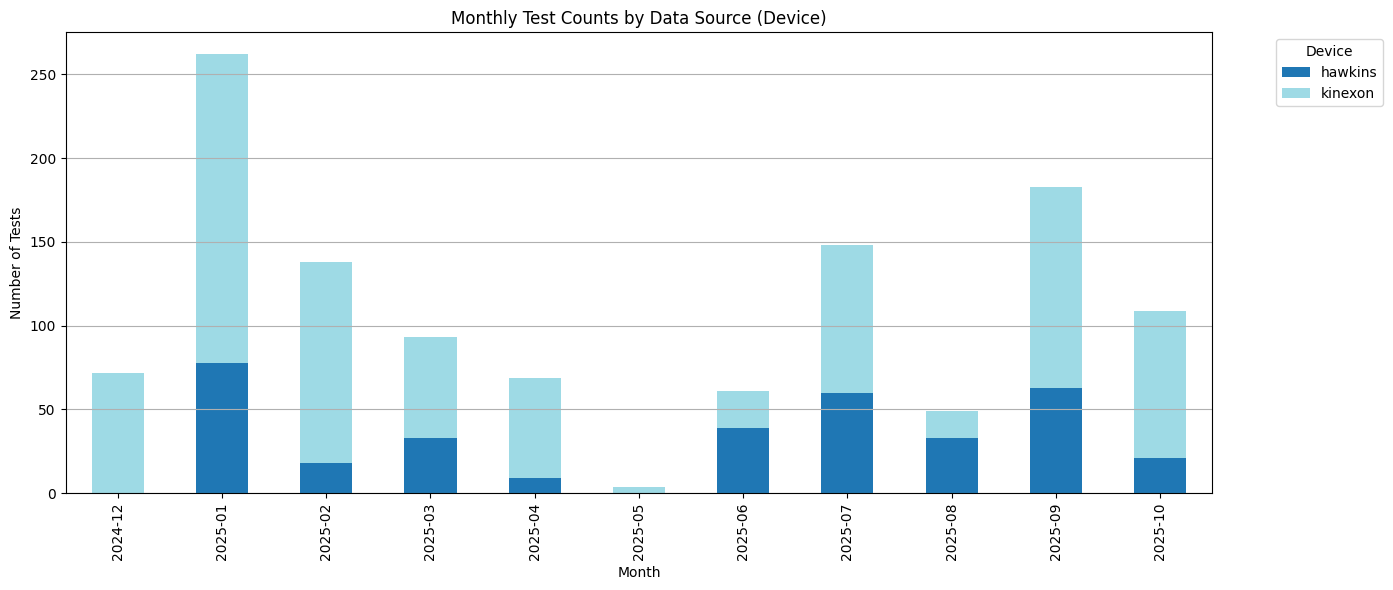

In [9]:
# 3.3B Breakdown of monthly test counts by data source (stacked bar chart)

# Load dataset and ensure timestamps are valid
df = pd.read_csv('../raw/selected_players_data.csv')
df['timestamp'] = pd.to_datetime(df['timestamp'], errors='coerce')

# Keep only rows with valid timestamps and device information
df = df.dropna(subset=['timestamp', 'device'])

# Create a 'month' column from timestamps
df['month'] = df['timestamp'].dt.to_period('M').dt.to_timestamp()

# Count number of tests per device per month
monthly_device_counts = df.groupby(['month', 'device']).size().unstack(fill_value=0)

# Format month index for display
monthly_device_counts.index = monthly_device_counts.index.strftime('%Y-%m')

# Plot stacked bar chart showing monthly test counts by device
monthly_device_counts.plot(kind='bar', stacked=True, figsize=(14, 6), colormap='tab20')
plt.title("Monthly Test Counts by Data Source (Device)")
plt.xlabel("Month")
plt.ylabel("Number of Tests")
plt.xticks(rotation=90)
plt.legend(title='Device', bbox_to_anchor=(1.05, 1), loc='upper left')
plt.tight_layout()
plt.grid(axis='y')
plt.show()

Gaps or unusual dips in data collection:
        month  test_count
2  2019-06-01           9
5  2020-08-01          18
7  2020-12-01          72
10 2021-03-01           9
15 2021-08-01         363
24 2022-06-01         210
35 2023-05-01         783
47 2024-05-01         250
59 2025-05-01         183


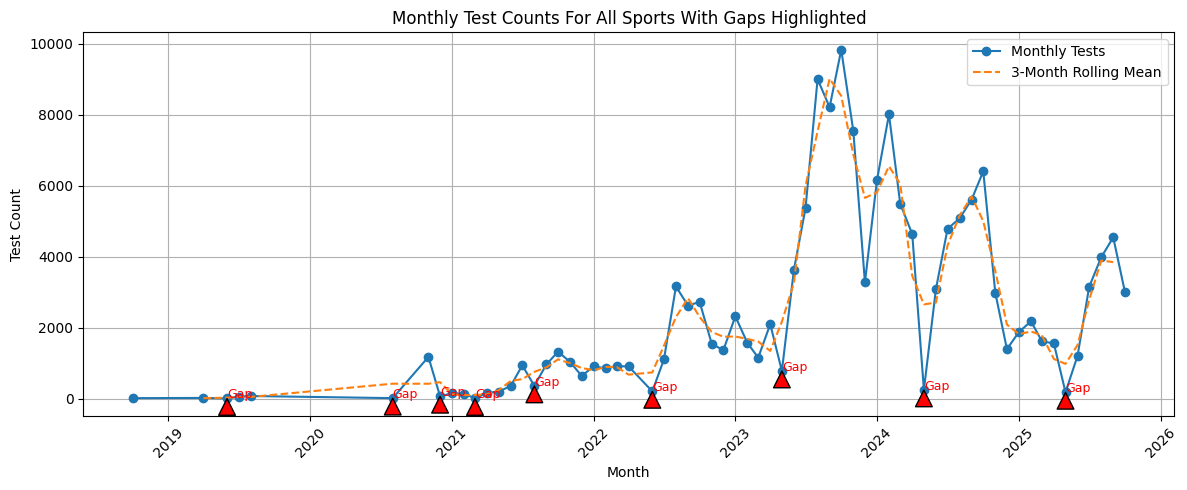

In [4]:
# 3.3C Identify gaps or unusual patterns in data collection

# Load dataset and ensure timestamps are valid
df = pd.read_csv('../raw/fivemetrics_allsports.csv')
df['timestamp'] = pd.to_datetime(df['timestamp'], errors='coerce')

# Keep only rows with valid timestamps
df = df.dropna(subset=['timestamp'])

# Create a 'month' column from timestamps
df['month'] = df['timestamp'].dt.to_period('M').dt.to_timestamp()

# Count number of tests per month
monthly_counts = df.groupby('month').size().reset_index(name='test_count')

# Calculate rolling mean (3-month window) and flag dips
monthly_counts['rolling_mean'] = monthly_counts['test_count'].rolling(window=3, center=True).mean()
monthly_counts['is_gap'] = monthly_counts['test_count'] < 0.5 * monthly_counts['rolling_mean']

# Identify months with gaps or zero tests
gaps = monthly_counts[monthly_counts['is_gap'] | (monthly_counts['test_count'] == 0)]
print("Gaps or unusual dips in data collection:")
print(gaps[['month', 'test_count']])

# Plot monthly test counts with rolling mean and highlight gaps
plt.figure(figsize=(12, 5))
plt.plot(monthly_counts['month'], monthly_counts['test_count'], marker='o', label='Monthly Tests')
plt.plot(monthly_counts['month'], monthly_counts['rolling_mean'], linestyle='--', label='3-Month Rolling Mean')

# Annotate gaps on the plot
for _, row in gaps.iterrows():
    plt.annotate('Gap',
                 xy=(row['month'], row['test_count']),
                 xytext=(row['month'], row['test_count'] + 5),
                 arrowprops=dict(facecolor='red', shrink=0.05),
                 fontsize=9, color='red')

plt.title("Monthly Test Counts For All Sports With Gaps Highlighted")
plt.xlabel("Month")
plt.ylabel("Test Count")
plt.xticks(rotation=45)
plt.grid(True)
plt.legend()
plt.tight_layout()
plt.show()

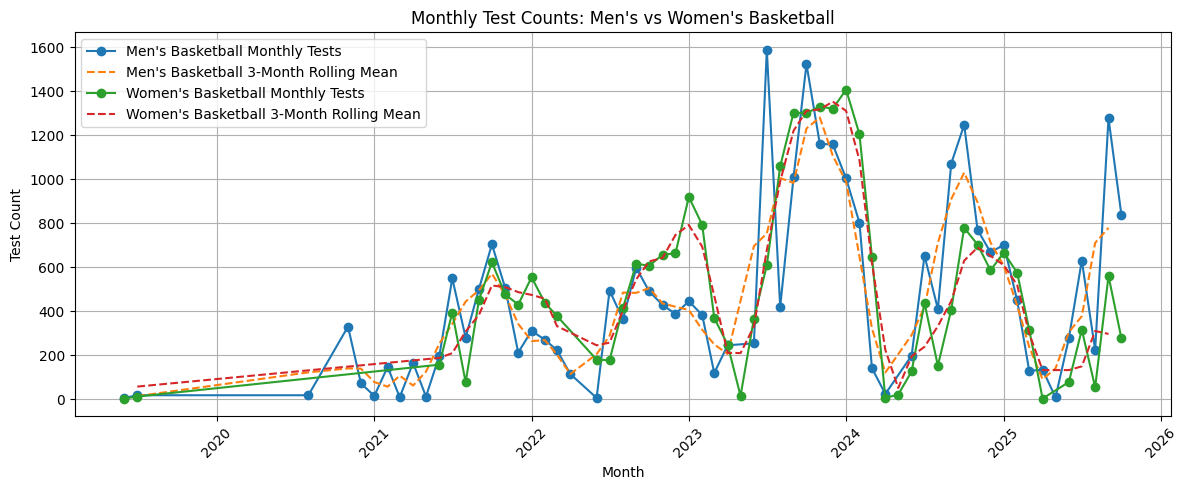

In [8]:
import matplotlib.pyplot as plt
import pandas as pd

# Load dataset and ensure timestamps are valid
df = pd.read_csv('../raw/fivemetrics_allsports.csv')
df['timestamp'] = pd.to_datetime(df['timestamp'], errors='coerce')

# Keep only rows with valid timestamps
df = df.dropna(subset=['timestamp'])

# Create a 'month' column from timestamps
df['month'] = df['timestamp'].dt.to_period('M').dt.to_timestamp()

# --- Separate Men’s and Women’s Basketball ---
sports = ["Men's Basketball", "Women's Basketball"]

plt.figure(figsize=(12, 5))

for sport in sports:
    sport_df = df[df['groupteam'] == sport]   # adjust column name if different
    monthly_counts = sport_df.groupby('month').size().reset_index(name='test_count')
    
    # Rolling mean for smoother trend
    monthly_counts['rolling_mean'] = monthly_counts['test_count'].rolling(window=3, center=True).mean()
    
    # Plot line for this sport
    plt.plot(monthly_counts['month'], monthly_counts['test_count'],
             marker='o', label=f"{sport} Monthly Tests")
    plt.plot(monthly_counts['month'], monthly_counts['rolling_mean'],
             linestyle='--', label=f"{sport} 3-Month Rolling Mean")

plt.title("Monthly Test Counts: Men's vs Women's Basketball")
plt.xlabel("Month")
plt.ylabel("Test Count")
plt.xticks(rotation=45)
plt.grid(True)
plt.legend()
plt.tight_layout()
plt.show()

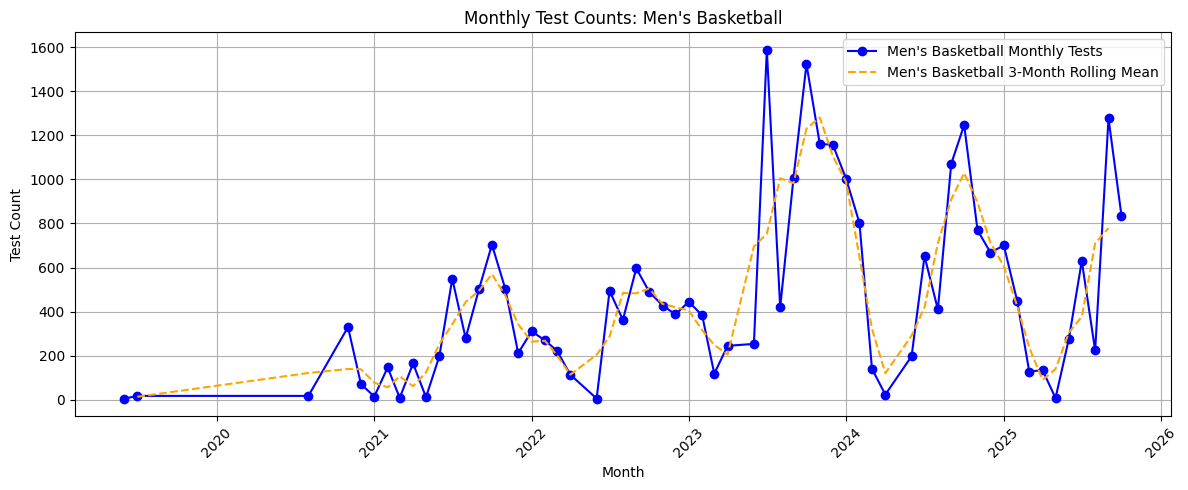

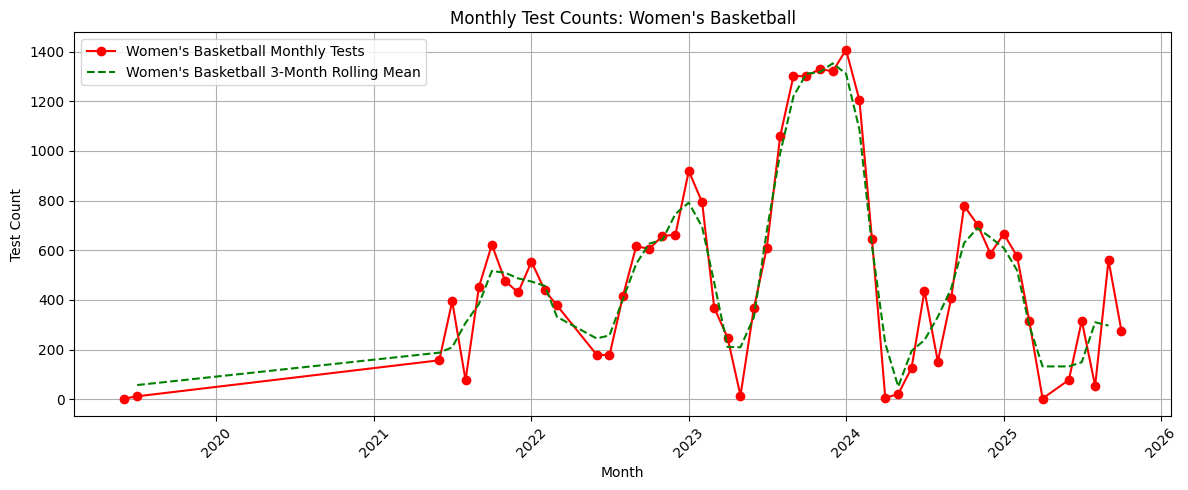

In [13]:
import matplotlib.pyplot as plt
import pandas as pd

# Load dataset and ensure timestamps are valid
df = pd.read_csv('../raw/fivemetrics_allsports.csv')
df['timestamp'] = pd.to_datetime(df['timestamp'], errors='coerce')

# Keep only rows with valid timestamps
df = df.dropna(subset=['timestamp'])

# Create a 'month' column from timestamps
df['month'] = df['timestamp'].dt.to_period('M').dt.to_timestamp()

# --- Separate Men’s and Women’s Basketball ---
sports = {
    "Men's Basketball": ("blue", "orange"),       
    "Women's Basketball": ("red", "green")     
}

for sport, (solid_color, dash_color) in sports.items():
    sport_df = df[df['groupteam'] == sport]
    monthly_counts = sport_df.groupby('month').size().reset_index(name='test_count')
    
    # Rolling mean for smoother trend
    monthly_counts['rolling_mean'] = monthly_counts['test_count'].rolling(window=3, center=True).mean()
    
    # Plot lines for this sport
    plt.figure(figsize=(12, 5))
    plt.plot(monthly_counts['month'], monthly_counts['test_count'],
             marker='o', color=solid_color, label=f"{sport} Monthly Tests")
    plt.plot(monthly_counts['month'], monthly_counts['rolling_mean'],
             linestyle='--', color=dash_color, label=f"{sport} 3-Month Rolling Mean")
    
    plt.title(f"Monthly Test Counts: {sport}")
    plt.xlabel("Month")
    plt.ylabel("Test Count")
    plt.xticks(rotation=45)
    plt.grid(True)
    plt.legend()
    plt.tight_layout()
    plt.show()

In [11]:
## Additional analyses and visualizations base on all players and 5 metrics

In [12]:
import seaborn as sns
import matplotlib.pyplot as plt
import pandas as pd

# 1. Load dataset
df = pd.read_csv("../raw/cleansports.csv")

# 2. Define metrics of interest
selected_metrics = [
    "Speed_Max",
    "Jump Height(M)",
    "Peak Velocity(M/S)",
    "Peak Propulsive Power(W)",
    "Distance_Total"
]

# 3. Filter dataset to include only selected metrics
df_filtered = df[df["metric"].isin(selected_metrics)]

# 4. Reset index for a cleaner DataFrame (optional)
df_filtered = df_filtered.reset_index(drop=True)

# 5. Print or save the filtered dataset
print(df_filtered)

# Save filtered dataset to CSV (optional)
df_filtered.to_csv("../raw/cleansports.csv", index=False)

             id   playername            timestamp   device  \
0          1138   PLAYER_677  2018-10-30 18:02:08  hawkins   
1          1154   PLAYER_677  2018-10-30 18:02:08  hawkins   
2          1155   PLAYER_677  2018-10-30 18:02:08  hawkins   
3          1186   PLAYER_677  2018-10-30 18:02:19  hawkins   
4          1201   PLAYER_677  2018-10-30 18:02:19  hawkins   
...         ...          ...                  ...      ...   
156120  6617108  PLAYER_1022  2025-10-21 12:24:21  kinexon   
156121  6617142  PLAYER_1055  2025-10-21 12:24:21  kinexon   
156122  6617259  PLAYER_1055  2025-10-21 12:24:21  kinexon   
156123  6617293  PLAYER_1084  2025-10-21 12:24:21  kinexon   
156124  6617410  PLAYER_1084  2025-10-21 12:24:21  kinexon   

                          metric        value  \
0                 Jump Height(M)     0.421500   
1       Peak Propulsive Power(W)  3125.112900   
2             Peak Velocity(M/S)     2.953000   
3                 Jump Height(M)     0.411900   
4       Pe

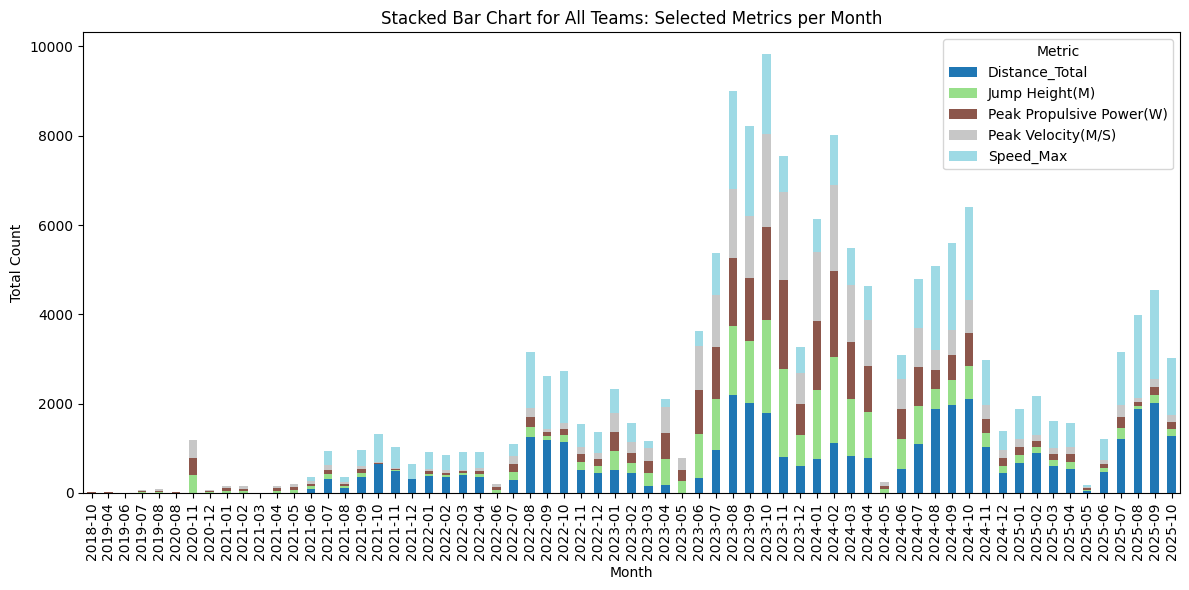

In [13]:
# Convert 'timestamp' column to datetime format
df_filtered["timestamp"] = pd.to_datetime(df_filtered["timestamp"])

# Group by month and metric, count number of occurrences
counts = df_filtered.groupby([df_filtered["timestamp"].dt.to_period("M"), "metric"]).size().reset_index(name="count")

# Pivot table so each metric becomes a separate column
pivoted = counts.pivot(index="timestamp", columns="metric", values="count").fillna(0)

# Convert PeriodIndex to string for cleaner plotting labels
pivoted.index = pivoted.index.astype(str)

# Plot stacked bar chart showing monthly counts for all metrics combined
pivoted.plot(
    kind="bar",
    stacked=True,
    figsize=(12, 6),
    colormap="tab20"
)

plt.ylabel("Total Count")
plt.xlabel("Month")
plt.title("Stacked Bar Chart for All Teams: Selected Metrics per Month")
plt.legend(title="Metric")
plt.tight_layout()
plt.show()

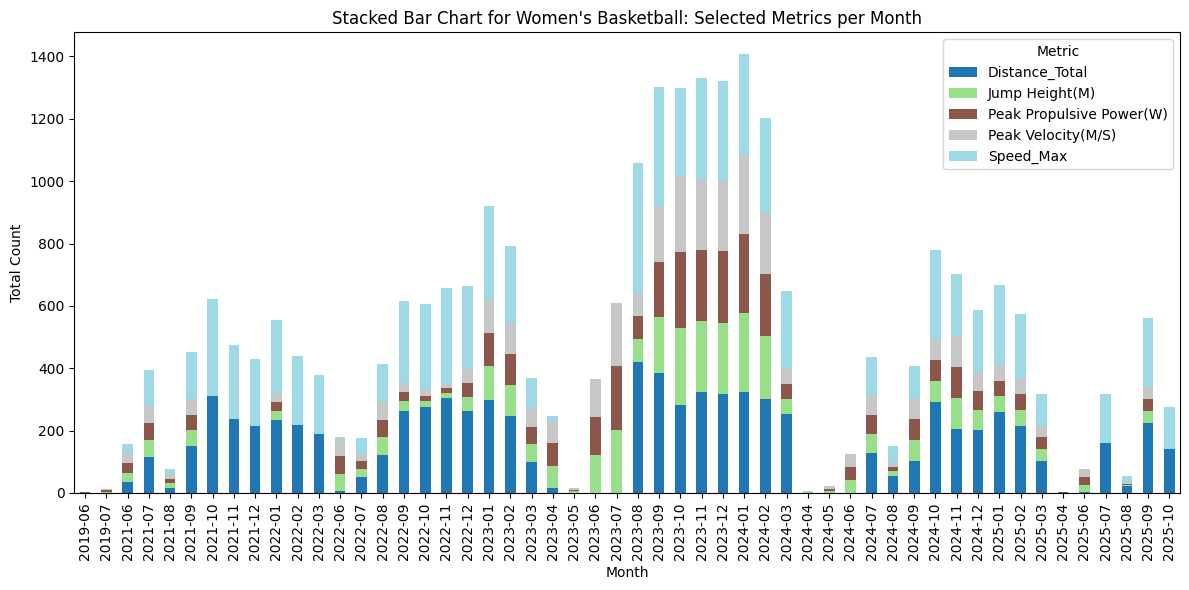

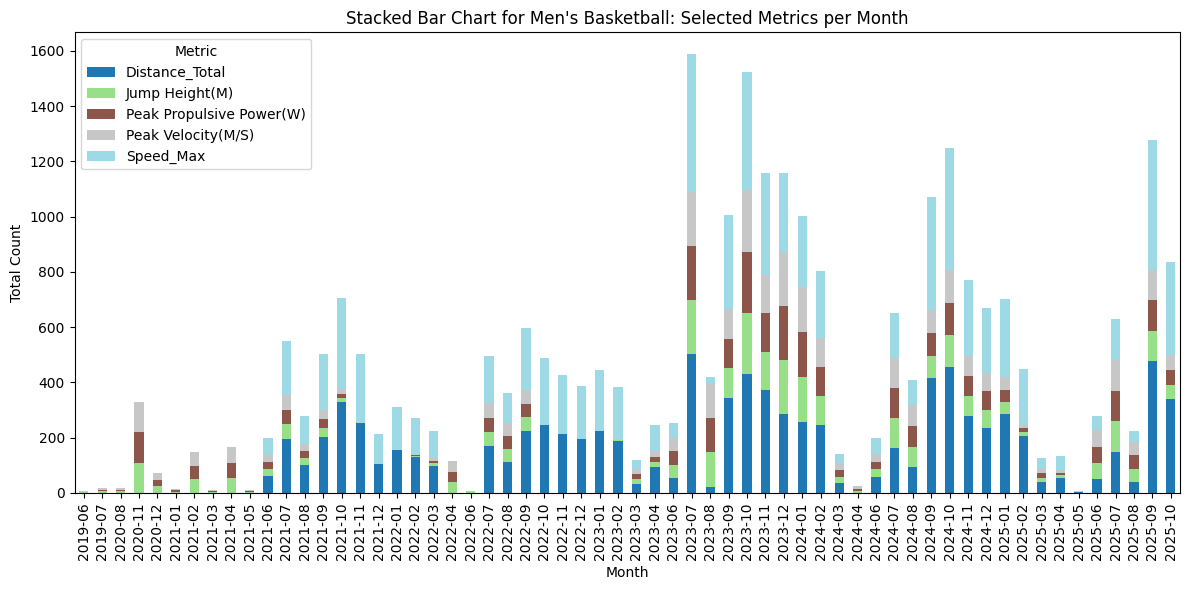

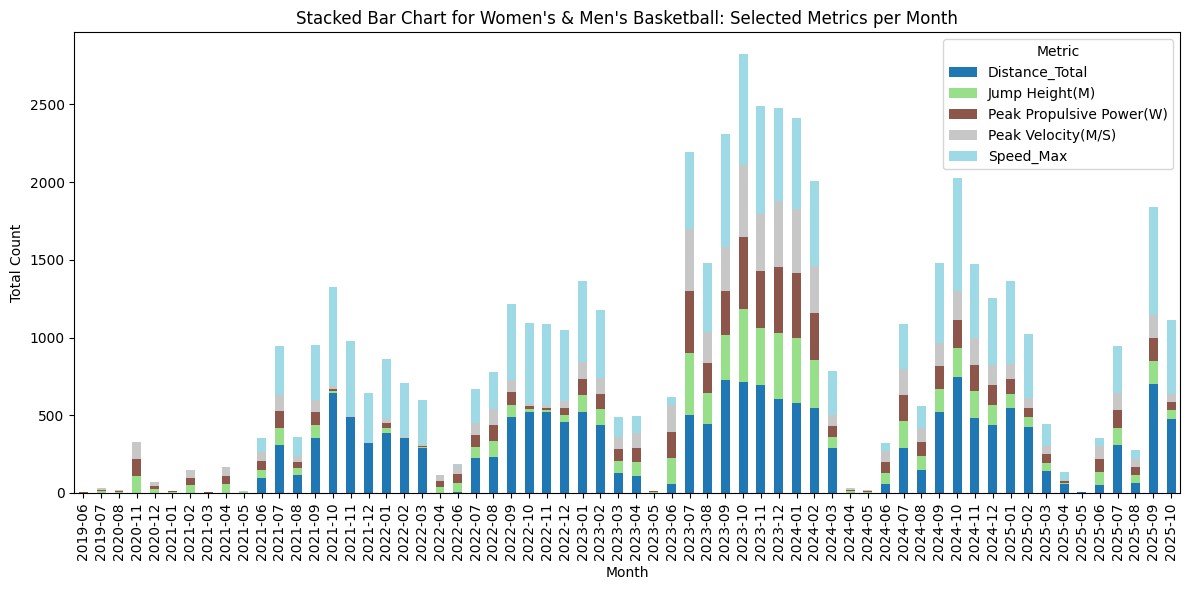

In [14]:
import matplotlib.pyplot as plt
import pandas as pd

# Filter dataset to include only Women's and Men's Basketball teams
df_filtered = df_filtered[df_filtered["groupteam"].isin(["Women's Basketball", "Men's Basketball"])]

# Convert 'timestamp' column to datetime format
df_filtered["timestamp"] = pd.to_datetime(df_filtered["timestamp"])

def plot_group_chart(df, group_name=None, title_suffix="Both"):
    """
    Plots stacked bar chart for given groupteam subset.
    If group_name is None, plots for both teams combined.
    """
    if group_name:
        df = df[df["groupteam"] == group_name]

    # Group by month and metric, count number of occurrences
    counts = df.groupby([df["timestamp"].dt.to_period("M"), "metric"]).size().reset_index(name="count")

    # Pivot table so each metric becomes a separate column
    pivoted = counts.pivot(index="timestamp", columns="metric", values="count").fillna(0)

    # Convert PeriodIndex to string for cleaner plotting labels
    pivoted.index = pivoted.index.astype(str)

    # Plot stacked bar chart
    pivoted.plot(
        kind="bar",
        stacked=True,
        figsize=(12, 6),
        colormap="tab20"
    )
    plt.ylabel("Total Count")
    plt.xlabel("Month")
    plt.title(f"Stacked Bar Chart for {title_suffix}: Selected Metrics per Month")
    plt.legend(title="Metric")
    plt.tight_layout()
    plt.show()

# 1. Women's Basketball
plot_group_chart(df_filtered, group_name="Women's Basketball", title_suffix="Women's Basketball")

# 2. Men's Basketball
plot_group_chart(df_filtered, group_name="Men's Basketball", title_suffix="Men's Basketball")

# 3. Both together
plot_group_chart(df_filtered, group_name=None, title_suffix="Women's & Men's Basketball")

In [15]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# Copy filtered dataset for basketball analysis
basket_filtered = df_filtered.copy()

# Convert 'timestamp' column to datetime format
basket_filtered.loc[:, "timestamp"] = pd.to_datetime(basket_filtered["timestamp"], errors="coerce")

# Keep only Women's and Men's Basketball records
basket_filtered = basket_filtered[basket_filtered["groupteam"].str.contains("Basketball", na=False)]

# Restrict dataset to 2025 entries
basket_filtered = basket_filtered[basket_filtered["timestamp"].dt.year == 2025]

# Add numeric month (1–12) for regression or trend fitting
basket_filtered.loc[:, "timestamp_num"] = basket_filtered["timestamp"].dt.month

# Define metrics of interest
metrics = [
    "Speed_Max",
    "Jump Height(M)",
    "Peak Velocity(M/S)",
    "Peak Propulsive Power(W)",
    "Distance_Total"
]

# Fixed month labels for plotting
months = ["Jan","Feb","Mar","Apr","May","Jun","Jul","Aug","Sep","Oct","Nov","Dec"]

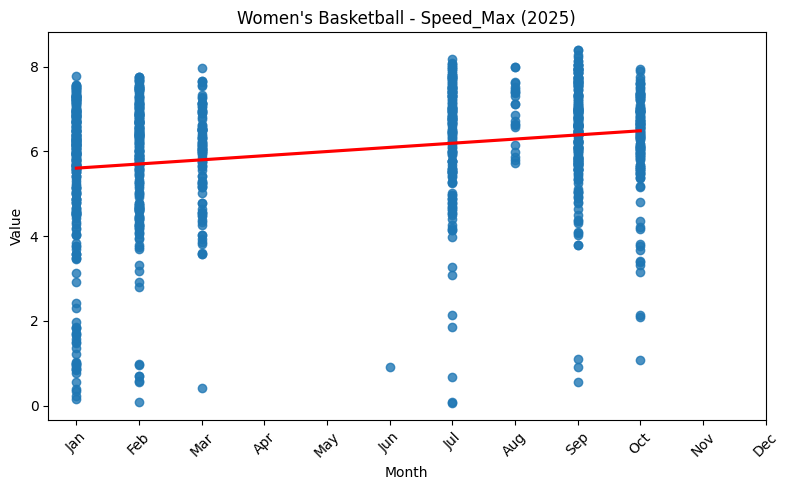

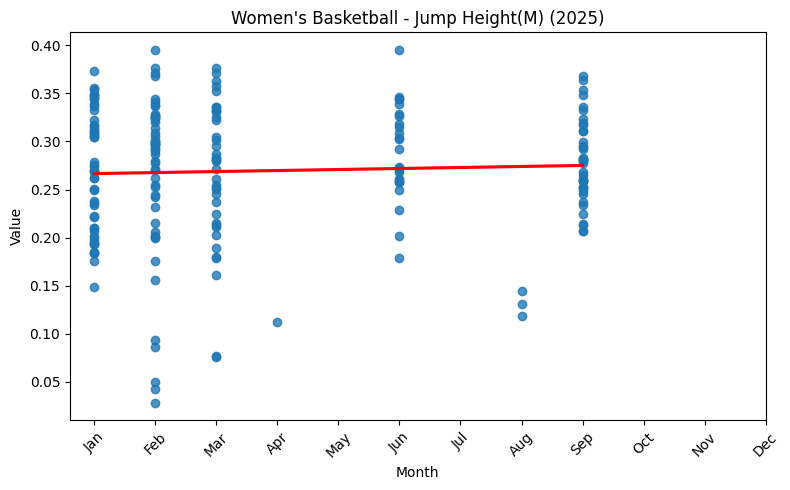

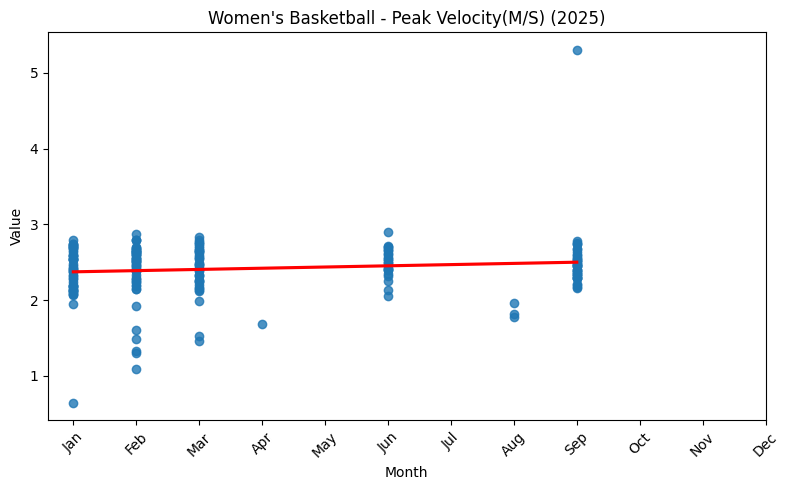

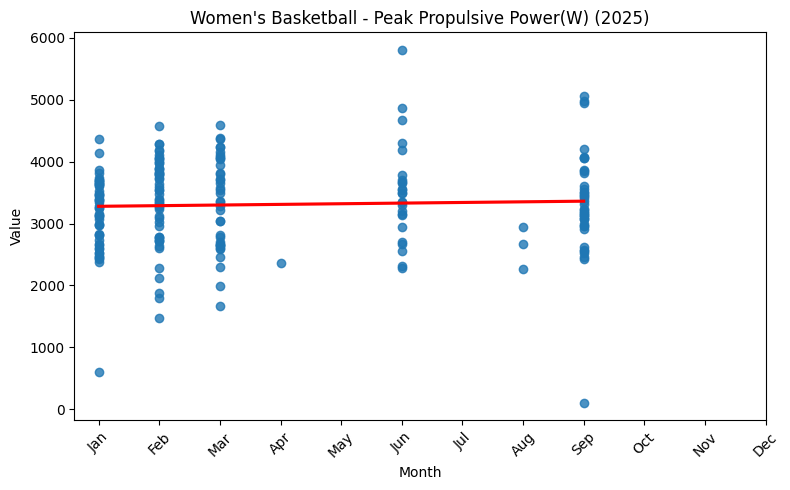

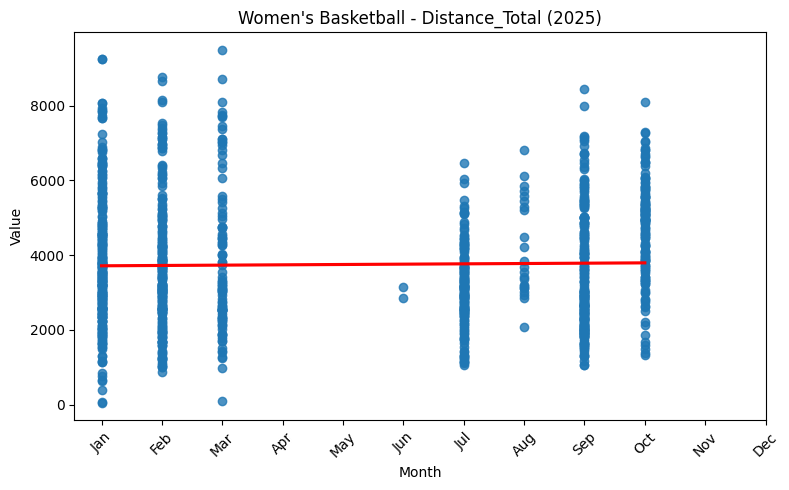

In [16]:
# Subset dataset for Women's Basketball
women_df = basket_filtered[basket_filtered["groupteam"].str.contains("Women's Basketball", na=False)].copy()

# Loop through each selected metric
for metric in metrics:
    plt.figure(figsize=(8, 5))
    data = women_df[women_df["metric"] == metric].copy()

    # Drop rows with missing month numbers or metric values
    data = data.dropna(subset=['timestamp_num', 'value'])

    # Skip plotting if no data is available for this metric
    if data.empty:
        print(f"No data for {metric}")
        continue

    # Scatter plot with regression line fit
    sns.regplot(
        data=data,
        x="timestamp_num",
        y="value",
        scatter=True,
        ci=None,
        line_kws={"color": "red"}
    )

    # Customize x-axis with month labels
    ax = plt.gca()
    ax.set_xticks(range(1, 13))
    ax.set_xticklabels(months, rotation=45)

    # Add labels and title
    plt.xlabel("Month")
    plt.title(f"Women's Basketball - {metric} (2025)")
    plt.ylabel("Value")
    plt.tight_layout()
    plt.show()

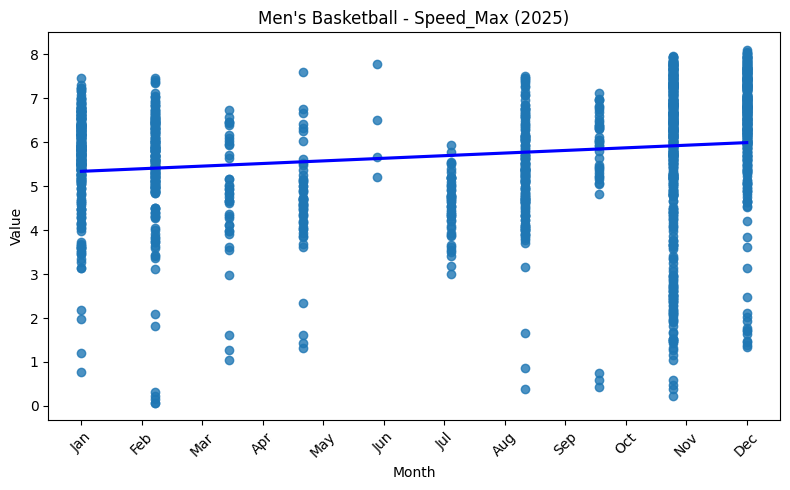

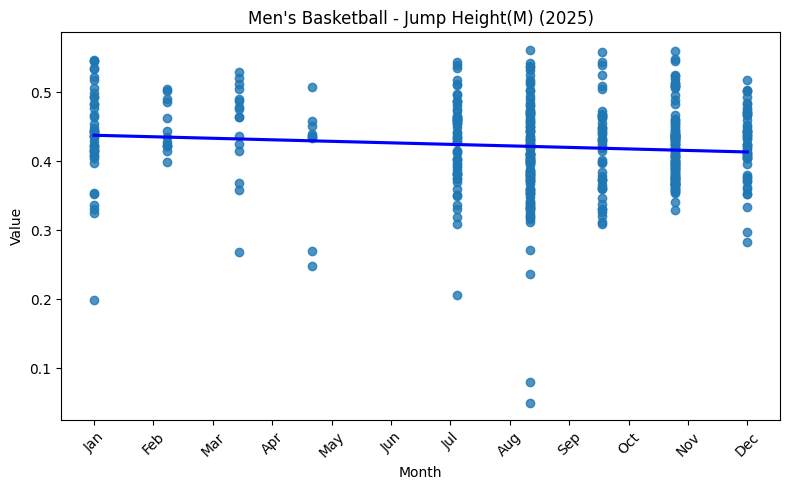

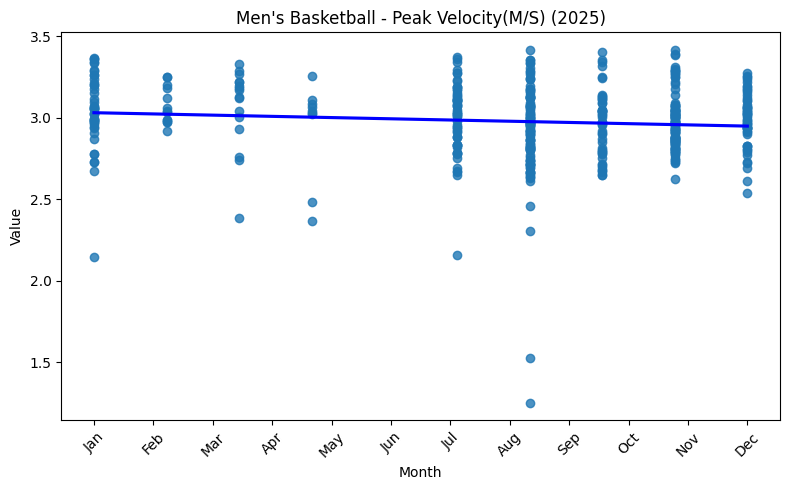

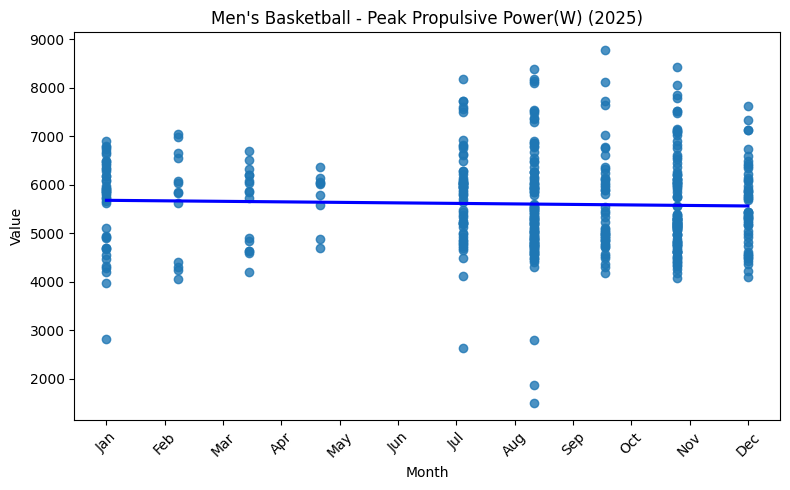

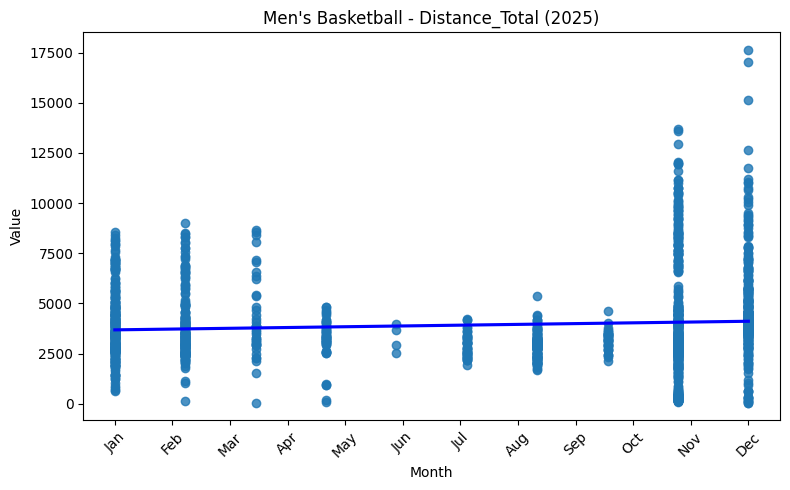

In [18]:
# Subset dataset for Men's Basketball
men_df = basket_filtered[basket_filtered["groupteam"] == "Men's Basketball"].copy()

# Loop through each selected metric
for metric in metrics:
    plt.figure(figsize=(8, 5))
    data = men_df[men_df["metric"] == metric]

    # Scatter plot with regression line fit
    sns.regplot(
        data=data,
        x="timestamp_num",
        y="value",
        scatter=True,
        ci=None,
        line_kws={"color": "blue"}
    )

    # Customize x-axis with month labels
    month_ordinals = np.linspace(data["timestamp_num"].min(), data["timestamp_num"].max(), 12)
    ax = plt.gca()
    ax.set_xticks(month_ordinals)
    ax.set_xticklabels(months, rotation=45)

    # Add labels and title
    plt.xlabel("Month")
    plt.title(f"Men's Basketball - {metric} (2025)")
    plt.ylabel("Value")
    plt.tight_layout()
    plt.show()

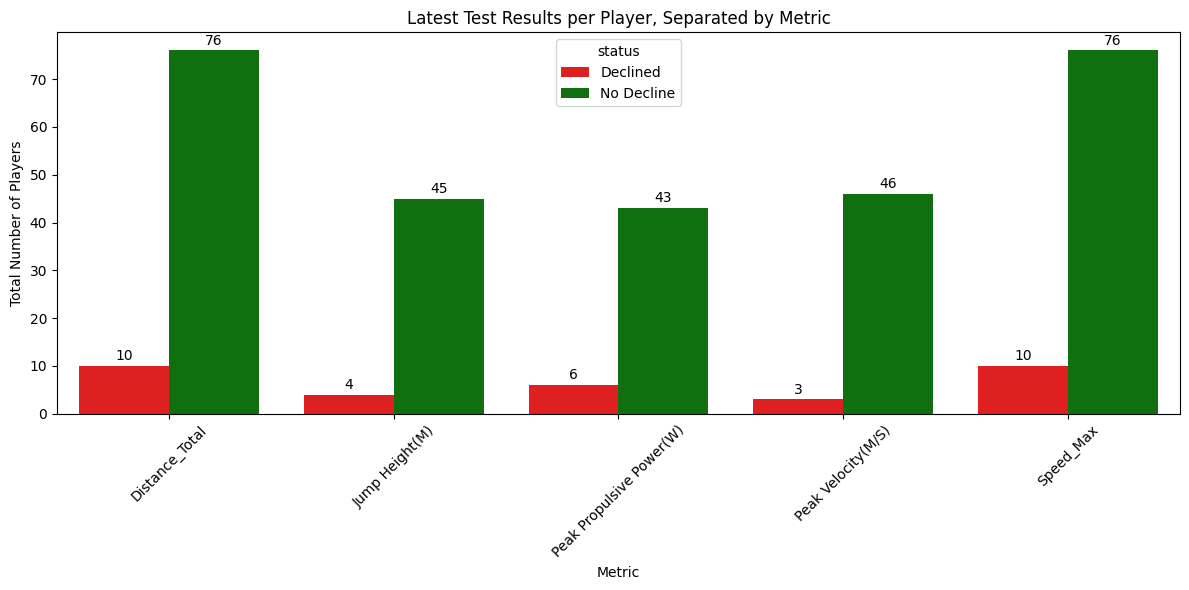

In [19]:
### RUN first part4_flags.py
# Flagging Chart from ../raw/part4_flagged_all_players.csv (ALL TIMEFRAME)

import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

# Load dataset and prepare timestamps
flagged = pd.read_csv("../raw/part4_flagged_all_players.csv")
flagged["timestamp"] = pd.to_datetime(flagged["timestamp"])
flagged = flagged.sort_values("timestamp")

# Keep only the most recent record per player + metric
latest_idx = flagged.groupby(["playername", "metric"])["timestamp"].idxmax()
latest_flagged = flagged.loc[latest_idx].reset_index(drop=True)

# Classify each record as Declined or No Decline
latest_flagged["status"] = latest_flagged["declined_vs_player_mean"].apply(
    lambda x: "No Decline" if "Acceptable" in str(x) else "Declined"
)

# Count number of players per metric and status
status_counts = latest_flagged.groupby(["metric", "status"]).size().reset_index(name="TotalPlayers")

# Plot grouped bar chart of player counts by metric and decline status
plt.figure(figsize=(12, 6))
ax = sns.barplot(
    data=status_counts,
    x="metric",
    y="TotalPlayers",
    hue="status",
    palette={"No Decline": "green", "Declined": "red"}
)

# Add labels to bars for clarity
for container in ax.containers:
    ax.bar_label(container, fmt='%d', label_type='edge', padding=2)

# Customize chart appearance
plt.title("Latest Test Results per Player, Separated by Metric")
plt.xlabel("Metric")
plt.ylabel("Total Number of Players")
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

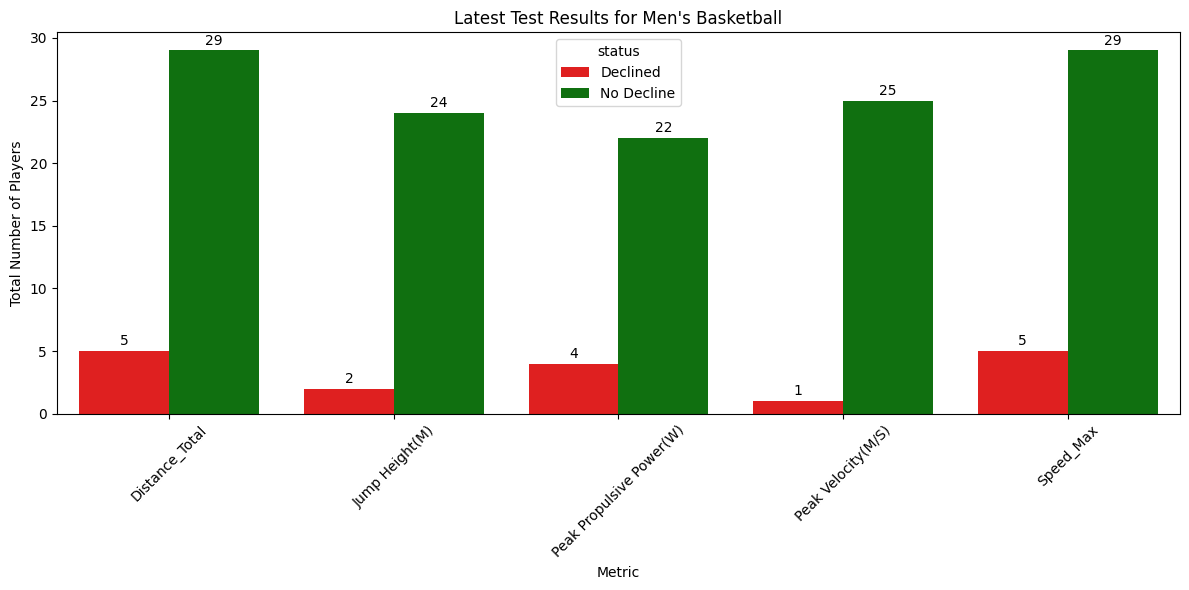

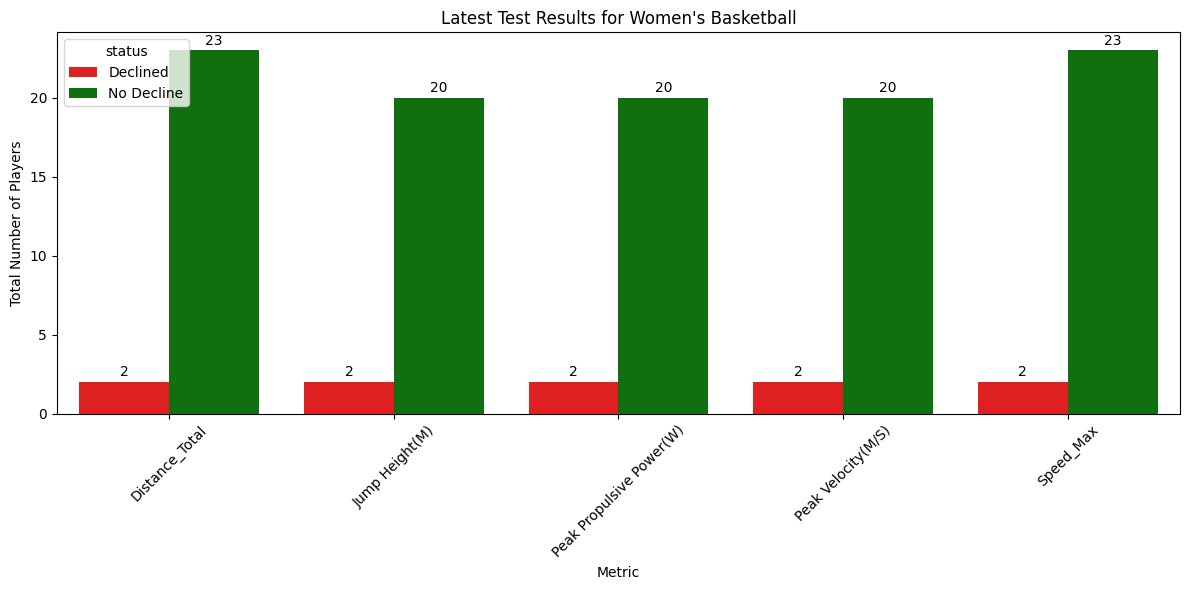

In [20]:
# Flagging Chart from part4_flagged_all_players.csv (ALL TIMEFRAME)

import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

# Load dataset and prepare timestamps
flagged = pd.read_csv("../raw/part4_flagged_all_players.csv")
flagged["timestamp"] = pd.to_datetime(flagged["timestamp"])
flagged = flagged.sort_values("timestamp")

# Keep only the most recent record per player + metric
latest_idx = flagged.groupby(["playername", "metric"])["timestamp"].idxmax()
latest_flagged = flagged.loc[latest_idx].reset_index(drop=True)

# Classify each record as Declined or No Decline
latest_flagged["status"] = latest_flagged["declined_vs_player_mean"].apply(
    lambda x: "No Decline" if "Acceptable" in str(x) else "Declined"
)

# Filter dataset to include only Men's and Women's Basketball
filtered_flagged = latest_flagged[
    latest_flagged["groupteam"].isin(["Men's Basketball", "Women's Basketball"])
]

# Loop through each team and plot results separately
for team in ["Men's Basketball", "Women's Basketball"]:
    team_df = filtered_flagged[filtered_flagged["groupteam"] == team]

    # Count number of players per metric and status
    status_counts = team_df.groupby(["metric", "status"]).size().reset_index(name="TotalPlayers")

    # Plot grouped bar chart of player counts by metric and decline status
    plt.figure(figsize=(12, 6))
    ax = sns.barplot(
        data=status_counts,
        x="metric",
        y="TotalPlayers",
        hue="status",
        palette={"No Decline": "green", "Declined": "red"}
    )

    # Add labels to bars for clarity
    for container in ax.containers:
        ax.bar_label(container, fmt='%d', label_type='edge', padding=2)

    # Customize chart appearance
    plt.title(f"Latest Test Results for {team}")
    plt.xlabel("Metric")
    plt.ylabel("Total Number of Players")
    plt.xticks(rotation=45)
    plt.tight_layout()
    plt.show()

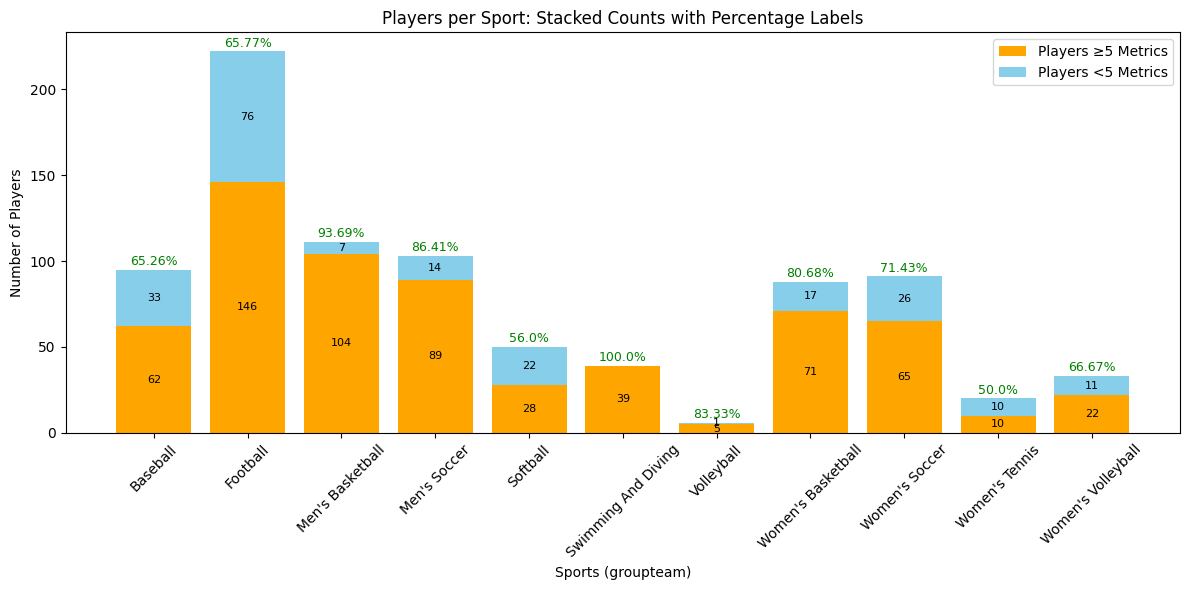

In [21]:
import pandas as pd
import matplotlib.pyplot as plt

# Load data
cleansports = pd.read_csv("../raw/cleansports.csv")

# Count measurements per player per metric per team (excluding NaN/zero values)
rawmetrics = cleansports[(cleansports['value'].notna()) & (cleansports['value'] != 0)]

counts = (
    rawmetrics
    .groupby(['groupteam', 'metric', 'playername'])
    .size()
    .reset_index(name='measurement_count')
)

# Flag players with ≥5 measurements
counts['has_5_or_more'] = counts['measurement_count'] >= 5

# Total players per team
total_players_per_team = (
    counts.groupby('groupteam')['playername']
    .nunique()
    .reset_index(name='total_players')
)

# Players with ≥5 measurements per team
players_with_5_or_more_per_team = (
    counts[counts['has_5_or_more']]
    .groupby('groupteam')['playername']
    .nunique()
    .reset_index(name='players_with_5_or_more')
)

# Merge totals and ≥5 counts
summary = total_players_per_team.merge(players_with_5_or_more_per_team, on='groupteam', how='left')
summary['players_with_5_or_more'] = summary['players_with_5_or_more'].fillna(0)

# Calculate percentage
summary['percentage_with_5_or_more'] = (
    summary['players_with_5_or_more'] / summary['total_players'] * 100
).round(2)

# --- Plot stacked bar with percentage labels ---
fig, ax = plt.subplots(figsize=(12,6))

# Stacked bar: players with ≥5 and remainder
bars1 = ax.bar(summary['groupteam'], summary['players_with_5_or_more'],
               label='Players ≥5 Metrics', color='orange')
bars2 = ax.bar(summary['groupteam'], summary['total_players'] - summary['players_with_5_or_more'],
               bottom=summary['players_with_5_or_more'], label='Players <5 Metrics', color='skyblue')

ax.set_xlabel('Sports (groupteam)')
ax.set_ylabel('Number of Players')
ax.set_title('Players per Sport: Stacked Counts with Percentage Labels')
ax.tick_params(axis='x', rotation=45)

# Add labels to stacked bars (counts)
for bar in bars1 + bars2:
    height = bar.get_height()
    if height > 0:
        ax.text(bar.get_x() + bar.get_width()/2,
                bar.get_y() + height/2,
                f'{int(height)}',
                ha='center', va='center', fontsize=8, color='black')

# Add percentage labels above each stacked bar group
for i, val in enumerate(summary['percentage_with_5_or_more']):
    ax.text(i, summary['total_players'][i] + 1,
            f'{val}%', ha='center', va='bottom', fontsize=9, color='green')

# Legends
ax.legend(loc='upper right')
plt.tight_layout()
plt.show()